In [15]:
# Importando as bibliotecas necessárias
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Definindo uma função para plotar a distribuição amostral da estatística de teste
def plot_dist(stat, df, alternative, p_value, alpha):
    # Criando uma figura e um eixo
    fig, ax = plt.subplots(figsize=(10,6))
    
    # Plotando a distribuição t de Student
    x = np.linspace(-4, 4, 1000)
    y = stats.t.pdf(x, df)
    ax.plot(x, y, color='blue', label='Distribuição t de Student')
    
    # Preenchendo a área sob a curva de acordo com a hipótese alternativa
    if alternative == 'two-sided':
        left = stats.t.ppf(alpha/2, df)
        right = stats.t.ppf(1-alpha/2, df)
        ax.fill_between(x, 0, y, where=(x <= left) | (x >= right), color='red', alpha=0.5, label='Região crítica')
        ax.axvline(x=left, color='black', linestyle='--', label='Valor crítico')
        ax.axvline(x=right, color='black', linestyle='--')
    elif alternative == 'greater':
        left = stats.t.ppf(1-alpha, df)
        ax.fill_between(x, 0, y, where=x >= left, color='red', alpha=0.5, label='Região crítica')
        ax.axvline(x=left, color='black', linestyle='--', label='Valor crítico')
    elif alternative == 'less':
        right = stats.t.ppf(alpha, df)
        ax.fill_between(x, 0, y, where=x <= right, color='red', alpha=0.5, label='Região crítica')
        ax.axvline(x=right, color='black', linestyle='--', label='Valor crítico')
    
    # Plotando o valor da estatística de teste
    ax.axvline(x=stat, color='green', label='Estatística de teste')
    
    # Adicionando o título, as legendas e os rótulos dos eixos
    ax.set_title(f'Distribuição amostral da estatística de teste, valor p = {p_value:.4f}')
    ax.legend()
    ax.set_xlabel('Valores da estatística de teste')
    ax.set_ylabel('Densidade de probabilidade')
    
    # Mostrando o gráfico
    plt.show()

In [17]:
# Exemplo 1: Testando a hipótese sobre a altura média dos brasileiros
# Hipótese nula: H0: μ = 1,70
# Hipótese alternativa bilateral: H1: μ ≠ 1,70
# Nível de significância: α = 0,05

# Gerando uma amostra aleatória de 100 pessoas, com média 1,72 e desvio padrão 0,1
np.random.seed(42) # Fixando a semente para reprodutibilidade
n = 100
x = np.random.normal(loc=1.72, scale=0.1, size=n)

In [26]:
# Calculando a média, o desvio padrão e a estatística de teste da amostra
x_mean = x.mean()
x_std = x.std(ddof=1)
t_stat = (x_mean - 1.70) / (x_std / np.sqrt(n))

print( f'A média é {x_mean:.2f}.\n O desvio é {x_std:.2f}.')

A média é 1.71.
 O desvio é 0.09.


In [27]:
# Calculando o valor p do teste bilateral
p_value = 2 * (1 - stats.t.cdf(t_stat, df=n-1))
p_value

0.2922843438341116

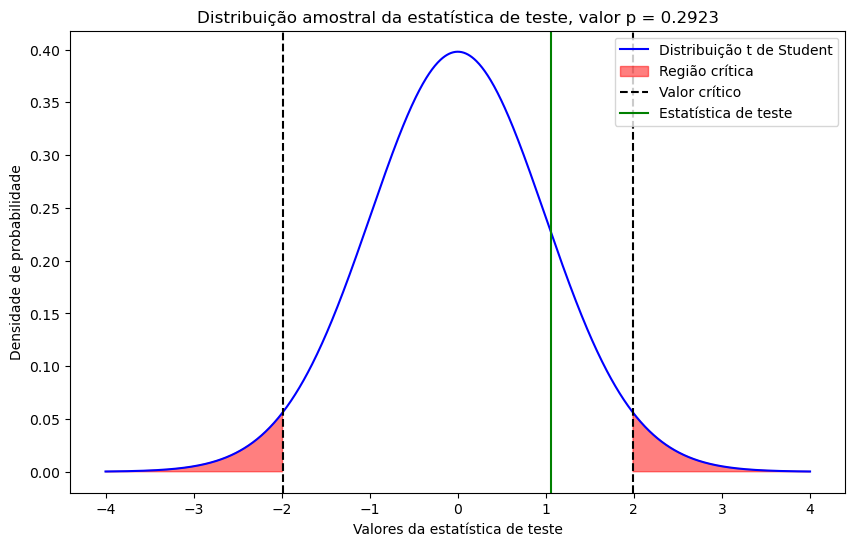

In [21]:
# Plotando a distribuição amostral da estatística de teste
plot_dist(t_stat, df=n-1, alternative='two-sided', p_value=p_value, alpha=0.05)

In [22]:
# Conclusão do teste
if p_value < 0.05:
    print('Rejeitamos a hipótese nula. Há evidências de que a altura média dos brasileiros é diferente de 1,70 m.')
else:
    print('Não rejeitamos a hipótese nula. Não há evidências de que a altura média dos brasileiros é diferente de 1,70 m.')

Não rejeitamos a hipótese nula. Não há evidências de que a altura média dos brasileiros é diferente de 1,70 m.
